<a href="https://colab.research.google.com/github/Nacho2904/orga_de_datos/blob/main/tp4_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import drive 
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Importando las imágenes

In [62]:
!cp '/content/drive/MyDrive/cards.zip' cards.zip

cp: cannot stat '/content/drive/MyDrive/cards.zip': Transport endpoint is not connected


In [63]:
with ZipFile("cards.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path="cards_folder")


In [64]:
data_dir = pathlib.Path("cards_folder/cards")
[x for x in data_dir.iterdir()][:5]

[PosixPath('cards_folder/cards/19441018.jpg'),
 PosixPath('cards_folder/cards/69025477.jpg'),
 PosixPath('cards_folder/cards/55241609.jpg'),
 PosixPath('cards_folder/cards/71280811.jpg'),
 PosixPath('cards_folder/cards/16509093.jpg')]

In [65]:
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

11426


Vemos que tenemos 11426 imágenes. Mostramos algunas de ellas

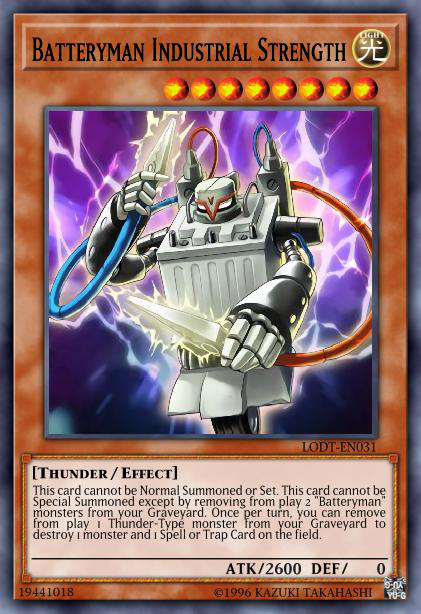

In [66]:
images = list(data_dir.glob('**/*.jpg'))
PIL.Image.open(str(images[0]))

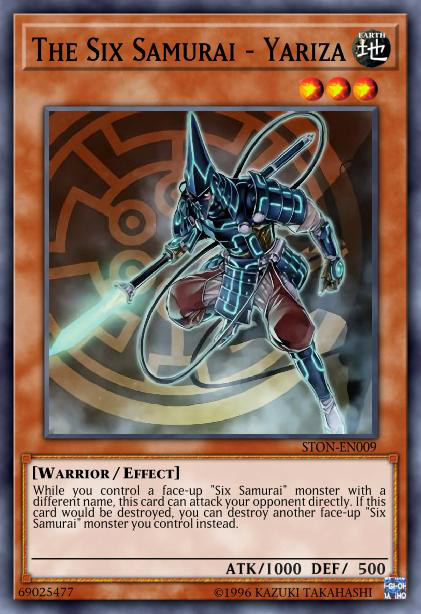

In [67]:
PIL.Image.open(str(images[1]))

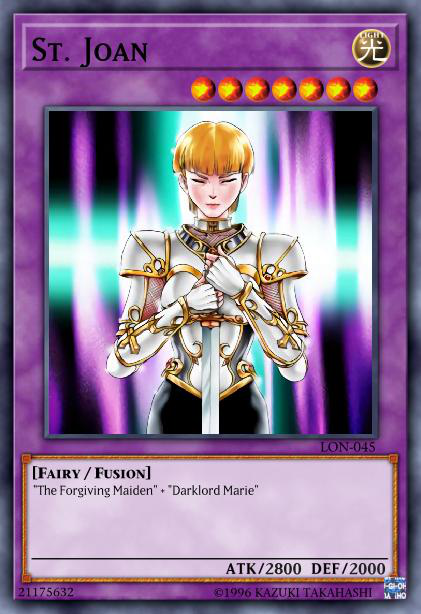

In [68]:
PIL.Image.open(str(images[700]))

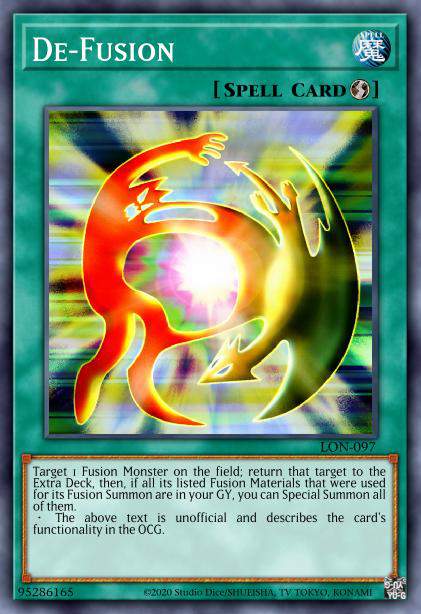

In [69]:
PIL.Image.open(str(images[-1]))

## Importando el dataset de información de las cartas

In [70]:
!wget https://github.com/ProjectIgnis/BabelCDB/raw/master/cards.cdb

--2022-11-22 19:59:45--  https://github.com/ProjectIgnis/BabelCDB/raw/master/cards.cdb
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ProjectIgnis/BabelCDB/master/cards.cdb [following]
--2022-11-22 19:59:45--  https://raw.githubusercontent.com/ProjectIgnis/BabelCDB/master/cards.cdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5816320 (5.5M) [application/octet-stream]
Saving to: ‘cards.cdb.1’

cards.cdb.1         100%[===================>]   5.55M  --.-KB/s    in 0.08s   

2022-11-22 19:59:45 (71.0 MB/s) - ‘cards.cdb.1’ saved [5816320/5816320]



In [85]:
!pip install pure-cdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import cdblib
with open('cards.cdb', 'rb') as f:
  data = f.read()
  reader = cdblib.Reader(data)
  print(reader.items())

[]
